# Moving Average Convergence and Divergence (MACD)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("nifty.csv", parse_dates=["date"], index_col="date")
df[['close']].head()

,close
date,
2010-01-04,5232
2010-01-05,5278
2010-01-06,5282
2010-01-07,5263
2010-01-08,5245


In [4]:
def MACD(data, fast_ma_period, slow_ma_period, signal_period):
    data["FMA"] = data['close'].ewm(span=fast_ma_period).mean()
    data["SMA"] = data['close'].ewm(span=slow_ma_period).mean()
    data["MACD"] = data["FMA"] - data["SMA"]
    data["Signal"] = data['MACD'].ewm(span=signal_period).mean()
    return data

In [5]:
fast = 12
slow = 26
signal = 9
df_MACD = MACD(df, fast, slow, signal)
df_MACD[["close", "MACD", "Signal"]].tail()

,close,MACD,Signal
date,,,
2022-07-13,15967,1.232642,-61.326628
2022-07-14,15939,-1.504320,-49.362167
2022-07-15,16049,5.143409,-38.461051
2022-07-18,16279,28.640708,-25.040700
2022-07-19,16341,51.669751,-9.698609


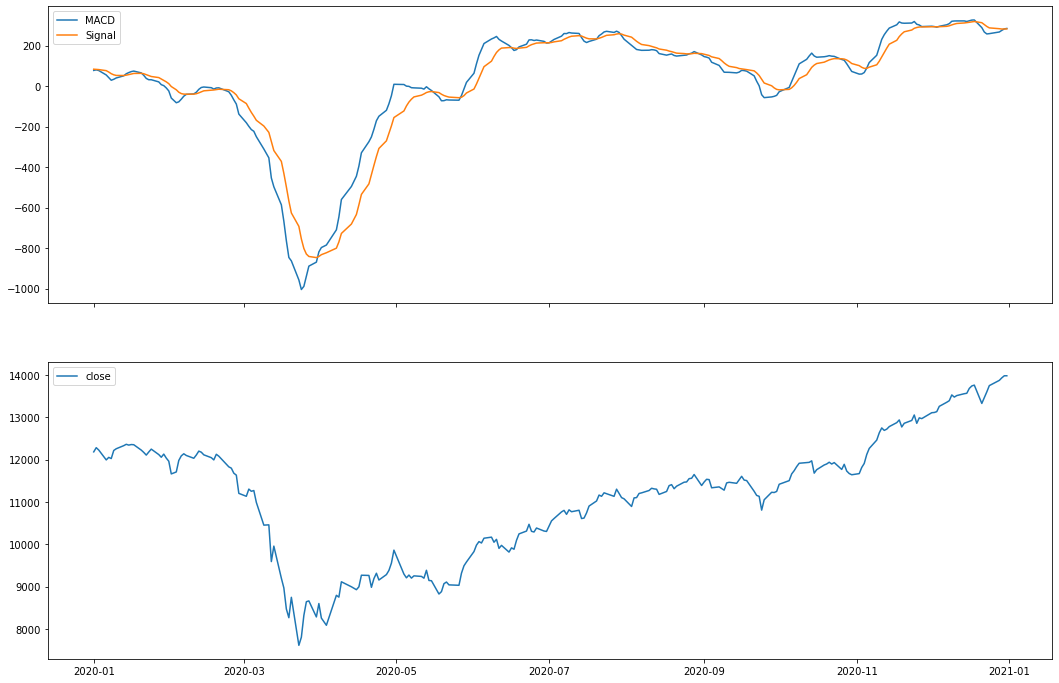

In [6]:
data2020 = df_MACD[["MACD", "Signal", 'close']].loc["2020"]
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 12))
ax1.plot(data2020[['MACD']], label='MACD')
ax1.plot(data2020[['Signal']], label='Signal')
ax1.legend(loc="upper left")
ax2.plot(data2020[['close']], label='close')
ax2.legend(loc="upper left")